In [4]:
#%matplotlib inline
#%matplotlib notebook

In [5]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [6]:
inputs = [
    ["LasRv3 rep1_Tube_001_050.fcs",0,0,'WT'],
    
    ["LasRv3 rep1_Tube_002_051.fcs",1e-8,0,'LasR'],
    ["LasRv3 rep1_Tube_003_052.fcs",1e-9,0,'LasR'],
    ["LasRv3 rep1_Tube_004_053.fcs",1e-10,0,'LasR'],
    ["LasRv3 rep1_Tube_005_054.fcs",1e-11,0,'LasR'],
    ["LasRv3 rep1_Tube_006_055.fcs",1e-12,0,'LasR'],
    ["LasRv3 rep1_Tube_007_056.fcs",1e-13,0,'LasR'],
    ["LasRv3 rep1_Tube_008_057.fcs",1e-14,0,'LasR'],
    ["LasRv3 rep1_Tube_009_058.fcs",0,0,'LasR'],
    
    ["LasRv3 rep1_Tube_010_059.fcs",1e-8,0.005,'LasR'],
    ["LasRv3 rep1_Tube_011_060.fcs",1e-9,0.005,'LasR'],
    ["LasRv3 rep1_Tube_012_061.fcs",1e-10,0.005,'LasR'],
    ["LasRv3 rep1_Tube_013_062.fcs",1e-11,0.005,'LasR'],
    ["LasRv3 rep1_Tube_014_063.fcs",1e-12,0.005,'LasR'],
    ["LasRv3 rep1_Tube_015_064.fcs",1e-13,0.005,'LasR'],
    ["LasRv3 rep1_Tube_016_065.fcs",1e-14,0.005,'LasR'],
    ["LasRv3 rep1_Tube_017_066.fcs",0,0.005,'LasR'],
    
    ["LasRv3 rep1_Tube_018_067.fcs",1e-8,0.01,'LasR'],
    ["LasRv3 rep1_Tube_019_068.fcs",1e-9,0.01,'LasR'],
    ["LasRv3 rep1_Tube_020_069.fcs",1e-10,0.01,'LasR'],
    ["LasRv3 rep1_Tube_021_070.fcs",1e-11,0.01,'LasR'],
    ["LasRv3 rep1_Tube_022_071.fcs",1e-12,0.01,'LasR'],
    ["LasRv3 rep1_Tube_023_072.fcs",1e-13,0.01,'LasR'],
    ["LasRv3 rep1_Tube_024_073.fcs",1e-14,0.01,'LasR'],
    ["LasRv3 rep1_Tube_025_074.fcs",0,0.01,'LasR'],
    
    ["LasRv3 rep1_Tube_026_075.fcs",1e-8,0.05,'LasR'],
    ["LasRv3 rep1_Tube_027_076.fcs",1e-9,0.05,'LasR'],
    ["LasRv3 rep1_Tube_028_077.fcs",1e-10,0.05,'LasR'],
    ["LasRv3 rep1_Tube_029_078.fcs",1e-11,0.05,'LasR'],
    ["LasRv3 rep1_Tube_030_079.fcs",1e-12,0.05,'LasR'],
    ["LasRv3 rep1_Tube_031_080.fcs",1e-13,0.05,'LasR'],
    ["LasRv3 rep1_Tube_032_081.fcs",1e-14,0.05,'LasR'],
    ["LasRv3 rep1_Tube_033_082.fcs",0,0.05,'LasR'],
    
    ["LasRv3 rep1_Tube_034_083.fcs",1e-8,0.1,'LasR'],
    ["LasRv3 rep1_Tube_035_084.fcs",1e-9,0.1,'LasR'],
    ["LasRv3 rep1_Tube_036_085.fcs",1e-10,0.1,'LasR'],
    ["LasRv3 rep1_Tube_037_086.fcs",1e-11,0.1,'LasR'],
    ["LasRv3 rep1_Tube_038_087.fcs",1e-12,0.1,'LasR'],
    ["LasRv3 rep1_Tube_039_088.fcs",1e-13,0.1,'LasR'],
    ["LasRv3 rep1_Tube_040_089.fcs",1e-14,0.1,'LasR'],
    ["LasRv3 rep1_Tube_041_090.fcs",0,0.1,'LasR'],
    
    ["LasRv3 rep1_Tube_042_091.fcs",1e-8,0.5,'LasR'],
    ["LasRv3 rep1_Tube_043_092.fcs",1e-9,0.5,'LasR'],
    ["LasRv3 rep1_Tube_044_093.fcs",1e-10,0.5,'LasR'],
    ["LasRv3 rep1_Tube_045_094.fcs",1e-11,0.5,'LasR'],
    ["LasRv3 rep1_Tube_046_095.fcs",1e-12,0.5,'LasR'],
    ["LasRv3 rep1_Tube_047_096.fcs",1e-13,0.5,'LasR'],
    ["LasRv3 rep1_Tube_048_097.fcs",1e-14,0.5,'LasR'],
    ["LasRv3 rep1_Tube_049_098.fcs",0,0.5,'LasR'],
    
   
    


]

       
tubes = []
for filename, ahl, iptg, family in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
    
ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
                   tubes = tubes).apply()
       


In [7]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


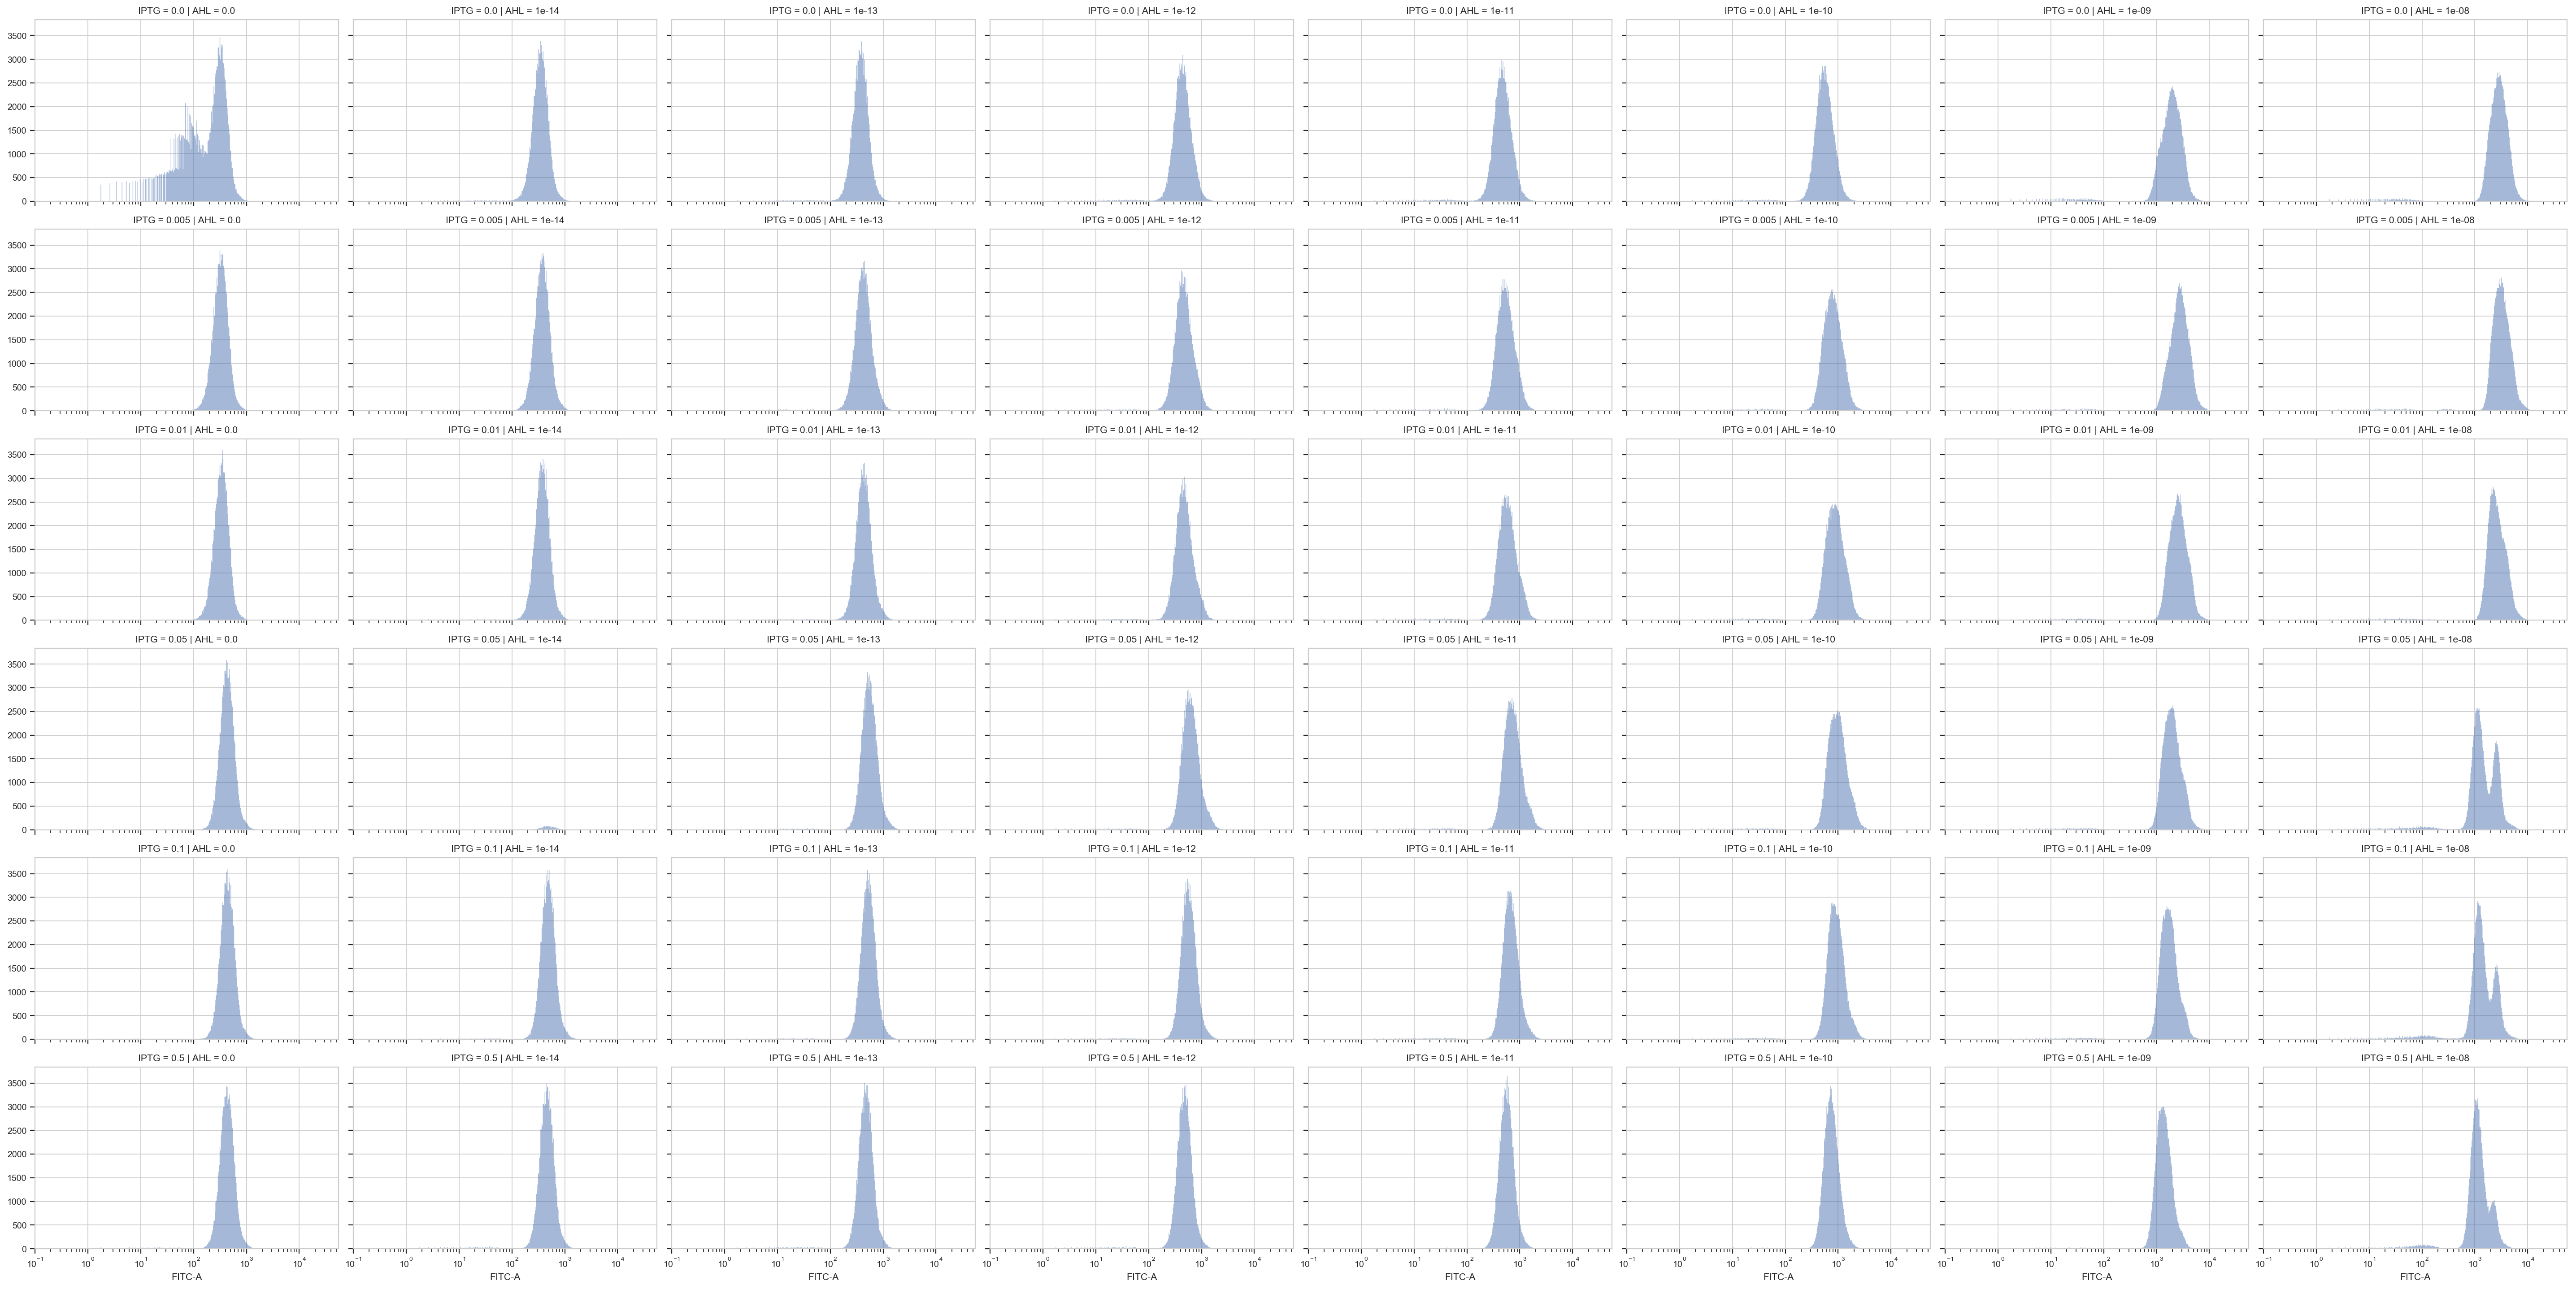

In [8]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "AHL",
                  yfacet = 'IPTG').plot(ex)

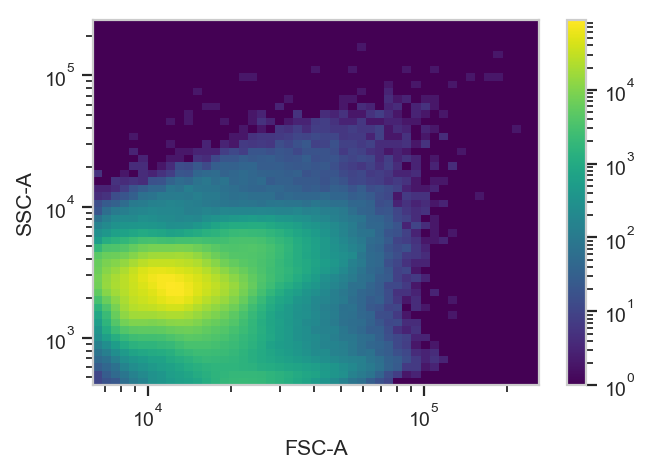

In [9]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

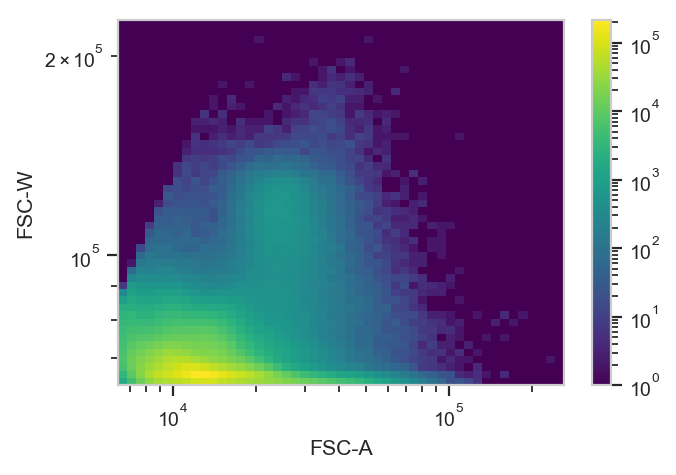

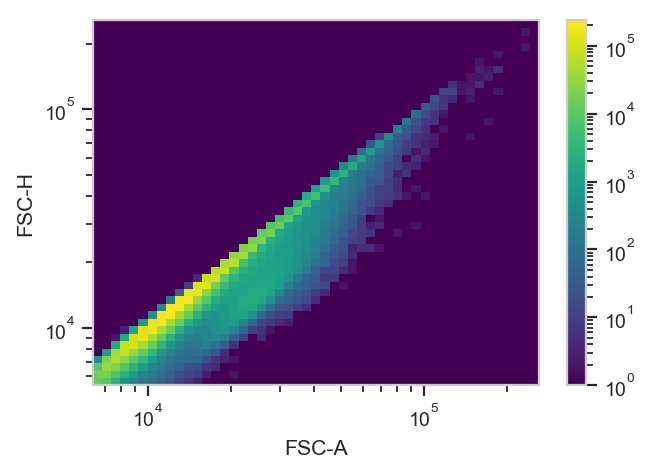

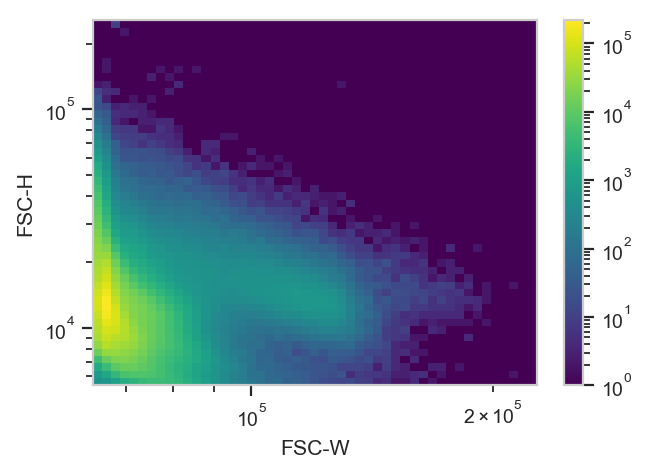

In [10]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


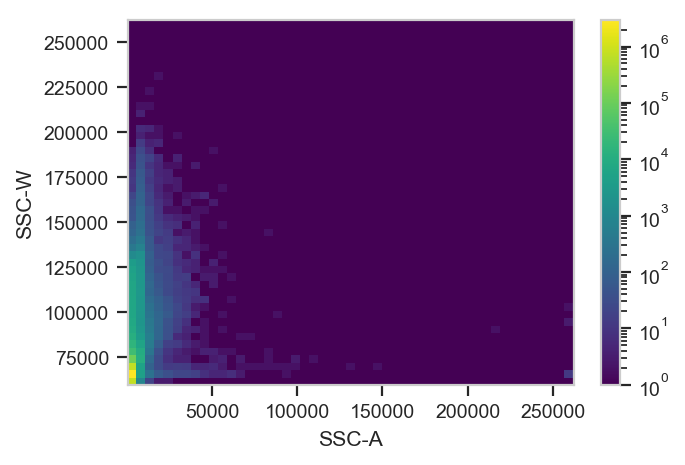

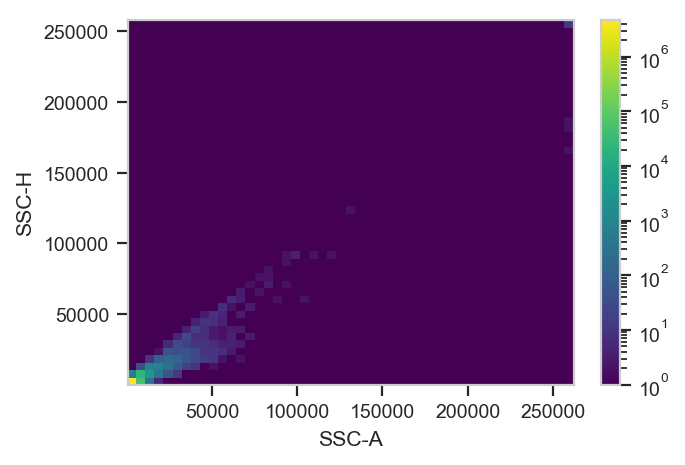

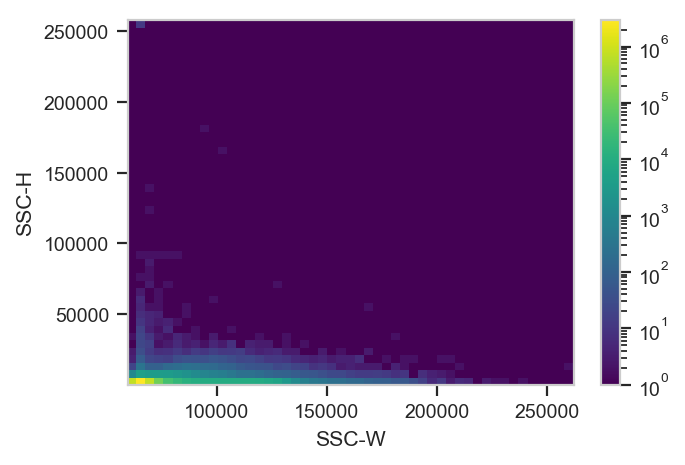

In [11]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

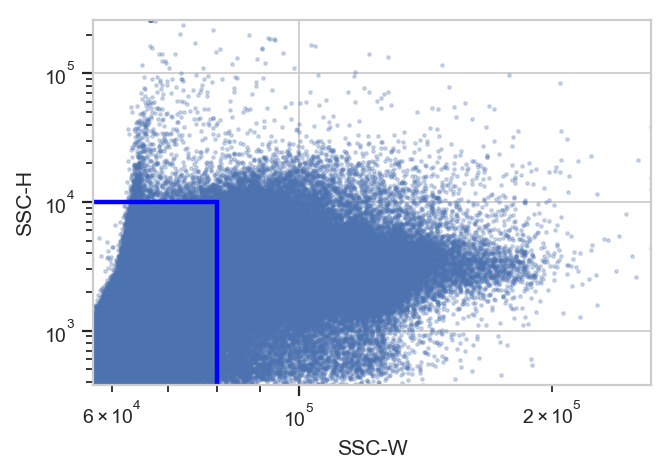

In [12]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


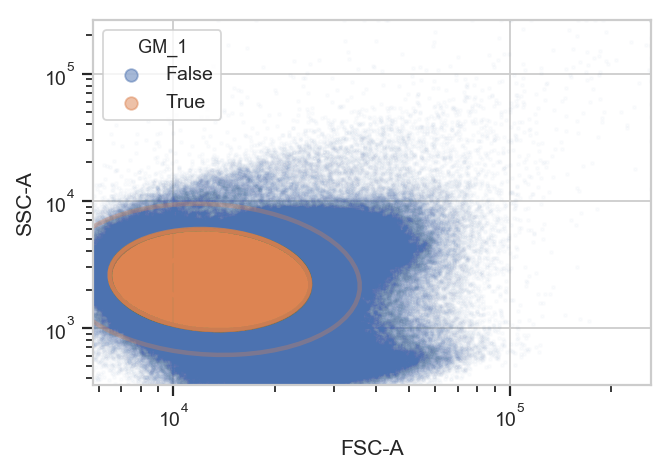

In [13]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


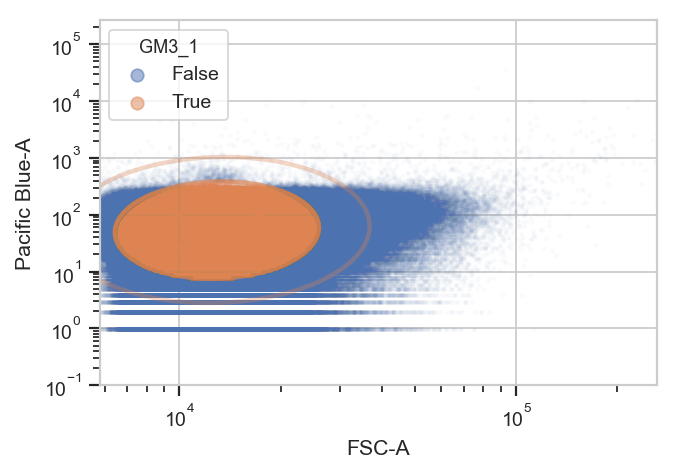

In [14]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [15]:
df =ex_gm2.data

take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [16]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,AHL,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,...,PerCP-Cy5-5-A,PerCP-Cy5-5-H,PerCP-Cy5-5-W,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
3,0.0,110.740005,59.0,123007.750000,17.600000,62.0,18603.767578,9091.419922,9258.0,64356.804688,...,8665.360352,9567.0,59359.574219,2107.600098,2190.0,63070.175781,52.299999,True,True,True
6,0.0,-8.820000,64.0,0.000000,80.959999,76.0,69813.093750,11022.270508,10856.0,66539.750000,...,13666.400391,12404.0,72205.843750,2881.119873,2908.0,64930.222656,52.500000,True,True,True
8,0.0,84.279999,87.0,63487.054688,84.479996,99.0,55924.050781,17336.041016,17303.0,65661.140625,...,19778.880859,20147.0,64338.550781,2568.719971,2611.0,64474.777344,52.599998,True,True,True
9,0.0,92.120003,49.0,123207.679688,54.560001,110.0,32505.857422,12347.220703,12346.0,65542.484375,...,11506.000000,10837.0,69581.734375,2724.479980,2750.0,64927.824219,52.599998,True,True,True
11,0.0,101.919998,134.0,49846.488281,117.040001,66.0,116217.171875,19555.970703,18454.0,69449.453125,...,28846.400391,25442.0,74305.390625,3566.639893,3490.0,66975.164062,52.700001,True,True,True
13,0.0,-27.440001,61.0,0.000000,62.480000,87.0,47065.394531,9198.000000,9171.0,65728.937500,...,7465.919922,7833.0,62464.765625,1538.239990,1603.0,62888.394531,52.700001,True,True,True
15,0.0,69.580002,70.0,65142.785156,34.320000,82.0,27429.214844,11796.800781,11830.0,65352.078125,...,8965.440430,9602.0,61191.324219,1902.559937,1954.0,63810.734375,52.799999,True,True,True
17,0.0,182.279999,104.0,114864.437500,89.760002,52.0,113125.218750,12026.750000,11408.0,69090.554688,...,11872.959961,11116.0,69998.773438,4033.040039,3956.0,66812.265625,52.900002,True,True,True
20,0.0,53.900002,99.0,35680.710938,17.600000,35.0,32955.246094,8038.030273,7671.0,68671.664062,...,13916.320312,13255.0,68805.734375,2456.080078,2503.0,64307.496094,53.000000,True,True,True
21,0.0,228.340012,240.0,62352.046875,202.399994,207.0,64079.644531,14985.440430,11723.0,83774.273438,...,42218.000000,37092.0,74592.875000,5560.719727,5099.0,71470.351562,53.000000,True,True,True


In [17]:
df.columns 



Index(['AHL', 'AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Family', 'IPTG', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time', 'Range2D', 'GM_1',
       'GM3_1'],
      dtype='object')

In [18]:
data = df[['FITC-A','AHL','IPTG','Family']]
data.insert(4,'Replicate',1)
data.to_pickle('../compiled-data/se/las/LasSE_1.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs

In [19]:
# Subtract WT background from samples
data = df[['FITC-A','AHL','IPTG','Family']]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
data = data[data.Family=='LasR']
data.drop('Family',inplace=True,axis=1)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
data['FITC-A'].min()

0.8799972534179688

In [21]:
data

,FITC-A,AHL,IPTG
100000,2999.919952,1.000000e-08,0.0
100002,1752.079987,1.000000e-08,0.0
100004,3898.399933,1.000000e-08,0.0
100005,2365.439972,1.000000e-08,0.0
100006,1561.120026,1.000000e-08,0.0
100009,4195.840118,1.000000e-08,0.0
100010,2310.879913,1.000000e-08,0.0
100011,1786.399933,1.000000e-08,0.0
100012,2625.040070,1.000000e-08,0.0
100014,3511.199982,1.000000e-08,0.0


# Plot median FITC-A

use median or geometeric mean 

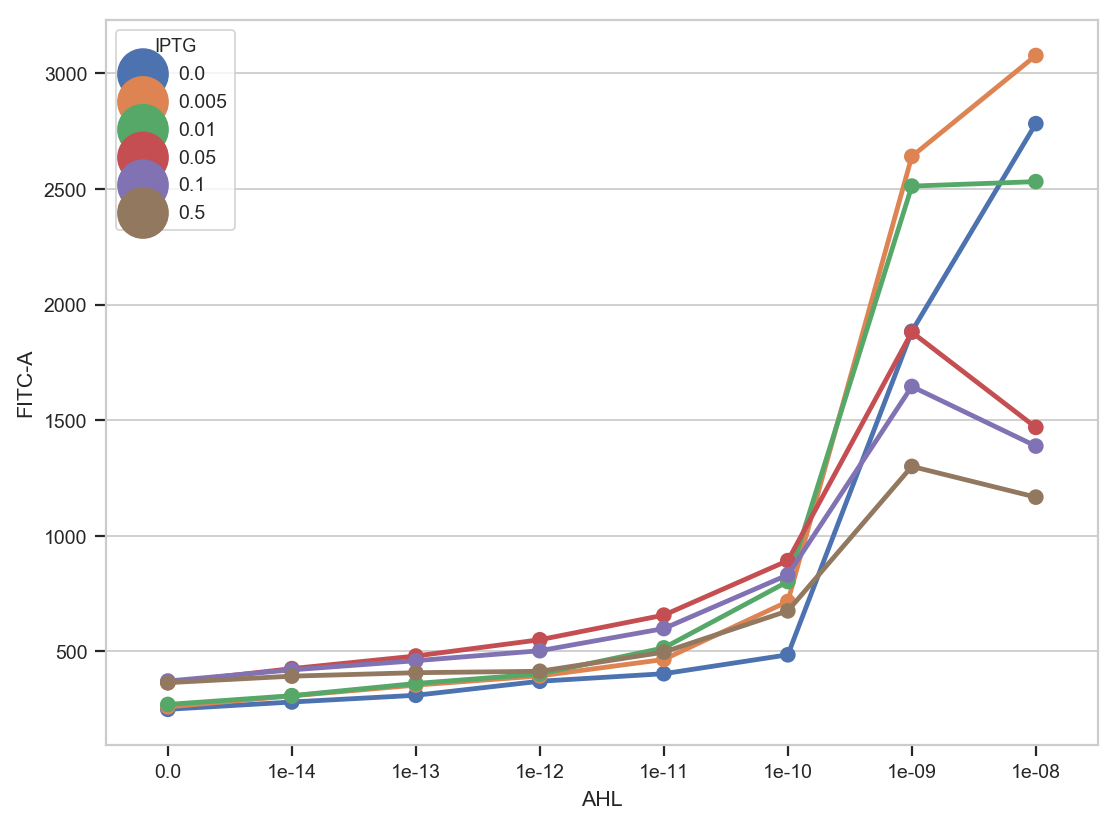

In [22]:
mfi = data.groupby(['AHL','IPTG'])['FITC-A'].median().reset_index()

f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',data=mfi)
f.savefig('Las.png',dpi=600)

# Plot heatmaps showing absolute and relative induction

Raw signal 

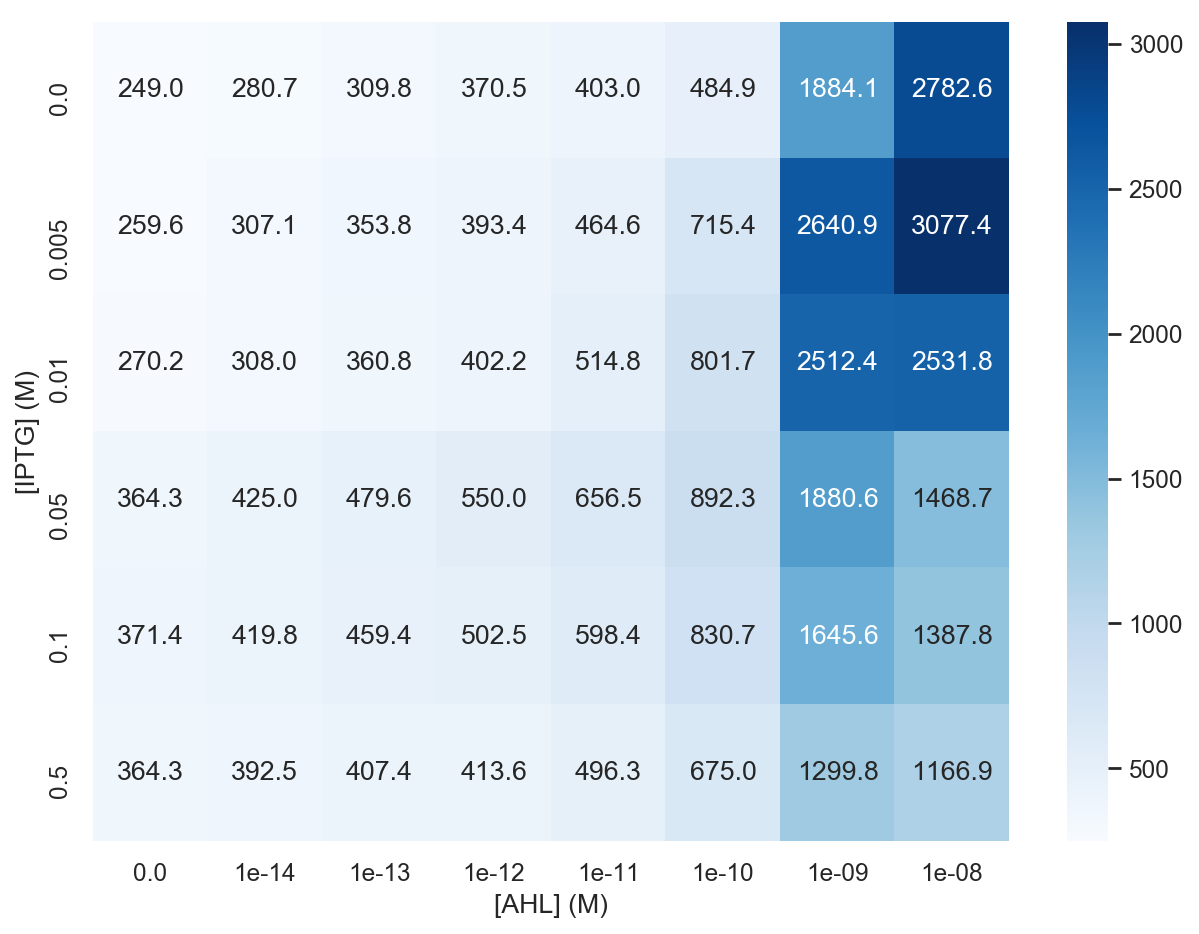

In [23]:
#LasMeans = Las.groupby(['C_ahl','C_iptg']).mean().reset_index()
sns.set(style="white")
#sns.set_style('Talk')
#LasTable = pd.pivot_table(LasMeans,values='FITC-A',index='C_iptg',columns='C_ahl')
f, ax = plt.subplots(figsize=(8,6))
#g = sns.heatmap(LasTable,vmin=0,vmax=100,xticklabels=[0,1e-10,1e-9,1e-7],yticklabels=[0,1e-3,1e-4,1e-5],ax=ax,square=True,cmap='Reds')



#f.savefig('LasHeatmap.png',dpi=600)

#mean['FITC-A']=mean['FITC-A']/mean['FITC-A'].max()*100

piv = mfi.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
#cbar.set_ticks([0, 25, 50, 75,100])
#cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

Normalized to highest signal 

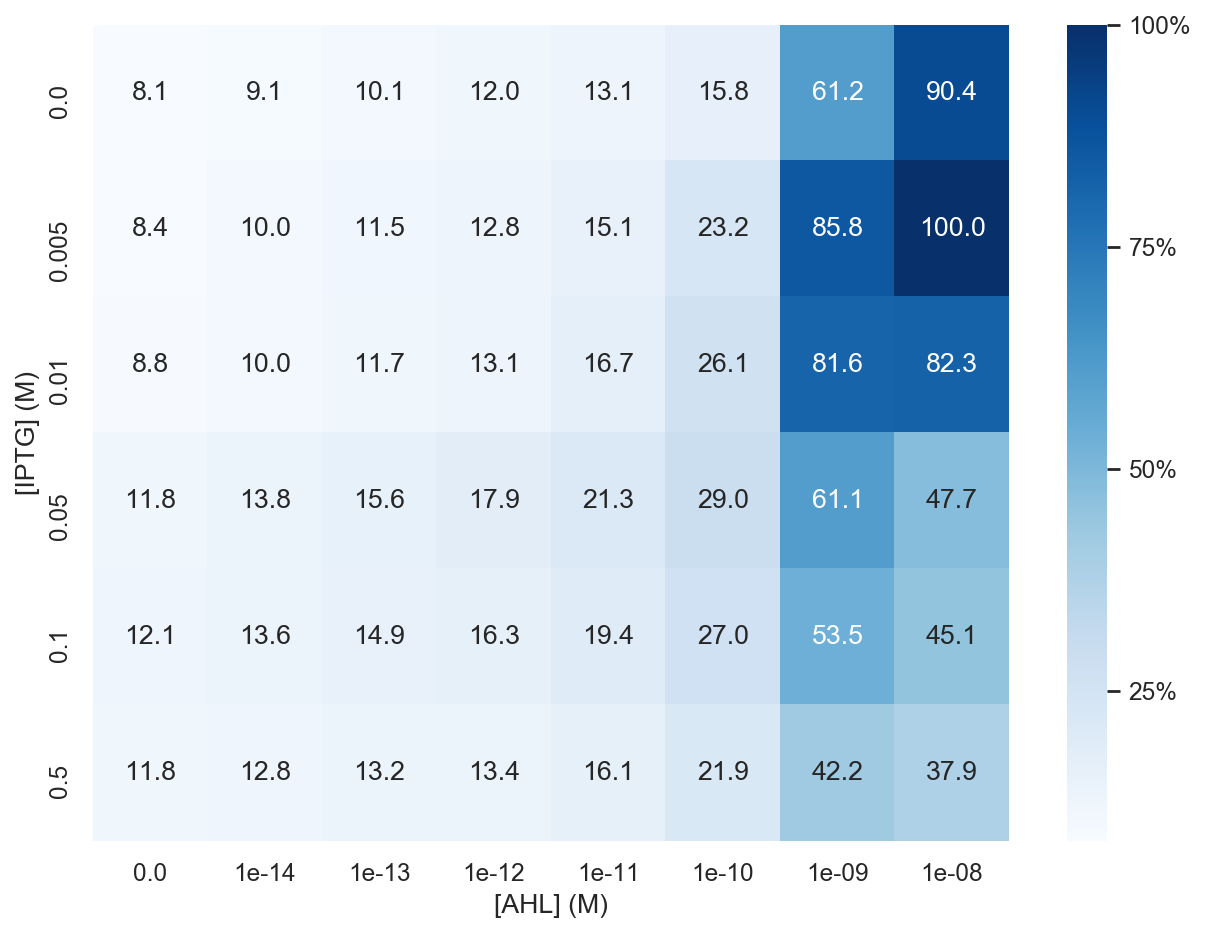

In [24]:
f, ax = plt.subplots(figsize=(8,6))
# normalized
norm = mfi.copy()
norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

piv = norm.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

# Calculate the on/off ratio and plot

In [25]:

R =[]
for i in mfi.IPTG.unique():
    tmp = mfi[mfi.IPTG ==i]['FITC-A'].max()/mfi[mfi.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])



In [26]:

R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])
R

,IPTG,Induction Ratio
0,0.000,11.173145
1,0.005,11.854237
2,0.010,9.371336
3,0.050,5.161836
4,0.100,4.431280
5,0.500,3.567633


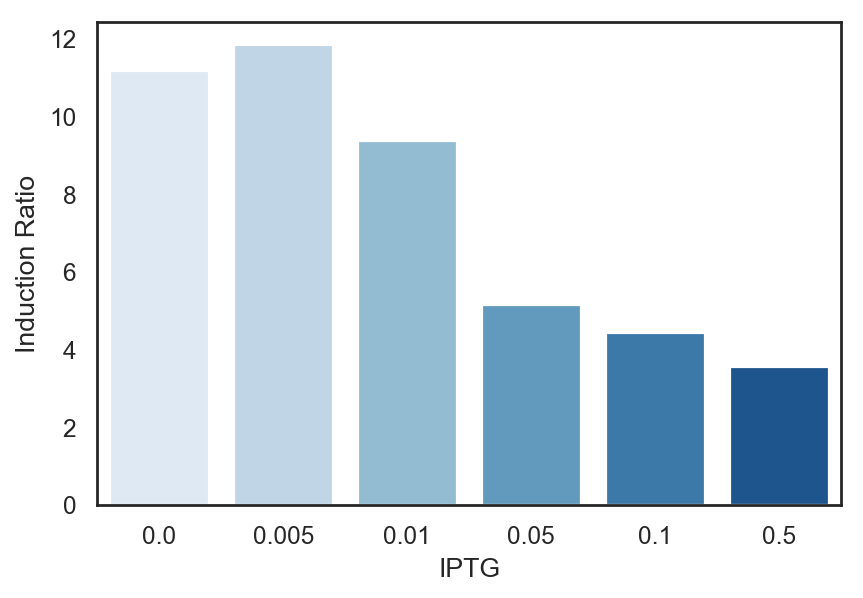

In [27]:
f, ax  = plt.subplots()
sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues')

STOP HERE